Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

Before you can establish a performance baseline on your forecast problem, you must develop a test harness. This is comprised of:
1. The dataset you intend to use to train and evaluate models.
2. The resampling technique you intend to use to estimate the performance of the technique (e.g. train/test split).
3. The performance measure you intend to use to evaluate forecasts (e.g. root mean squared error).

Three properties of a good technique for making a baseline forecast are:
- Simple: A method that requires little or no training or intelligence.
- Fast: A method that is fast to implement and computationally trivial to make a prediction.
- Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

A common algorithm used in establishing a baseline performance is the persistence algorithm.

### Persistance Algorithm
The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisfies the three above conditions for a baseline forecast.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv(r"./Datasets/shampoo.csv",index_col=0)

In [9]:
ts = pd.DataFrame()
ts['t'] = sales['Sales'].values

In [17]:
ts['t+1'] = ts['t'].shift(-1)
ts.dropna(inplace=True)

In [18]:
# forecast is value  t
# observed is value t+1

In [ ]:
%run Chapter_16_Backtest_Forecast_Models.ipynb
# block_split

In [19]:
from sklearn.metrics import mean_squared_error

In [36]:
train , test = block_split(ts,frac=0.66)
mse = mean_squared_error(test['t+1'],test['t'])
rmse = np.sqrt(mse)
print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))

# Population Observarions : 35 
# Train      Observations : 23 
# Test       Observarions : 12 
MSE : 18703.658
RMSE : 136.761


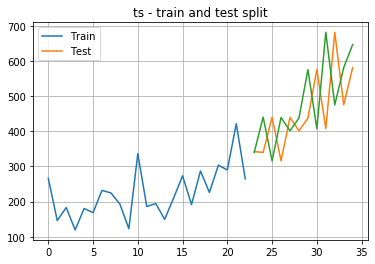

In [37]:
plot_train_test(train['t'],test)

### Summary
- The importance of establishing a baseline and the persistence algorithm that you can use.
- How to implement the persistence algorithm in Python from scratch.
- How to evaluate the forecasts of the persistence algorithm and use them as a baseline.